<a href="https://colab.research.google.com/github/villafue/LinkedIn_Python_Stastics_Essential_Training/blob/master/05_02_fitmodel_end.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Python statistics essential training - 05_02_fitmodel

Standard imports

In [1]:
import math
import os

In [2]:
os.chdir('sample_data')

In [3]:
import numpy as np
import pandas as pd

In [4]:
import matplotlib
import matplotlib.pyplot as plt

In [5]:
%matplotlib inline

In [6]:
import statsmodels
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Loading gapminder data for year 1985 (Live Aid!) and setting up plot as in chapter 3

In [7]:
gapminder = pd.read_csv('gapminder.csv')

In [8]:
'''
We're getting data from year 1985 because it is the yaer of "Live Aid"
'''
gdata = gapminder.query('year == 1985')

In [40]:
display(gdata.info())
display(gdata.describe().T)
gdata.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182 entries, 50 to 14709
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           182 non-null    object 
 1   year              182 non-null    int64  
 2   region            182 non-null    object 
 3   population        182 non-null    float64
 4   life_expectancy   182 non-null    float64
 5   age5_surviving    182 non-null    float64
 6   babies_per_woman  182 non-null    float64
 7   gdp_per_capita    182 non-null    float64
 8   gdp_per_day       182 non-null    float64
dtypes: float64(6), int64(1), object(2)
memory usage: 14.2+ KB


None

,count,mean,std,min,25%,50%,75%,max
year,182.0,1.985000e+03,0.000000e+00,1985.000000,1.985000e+03,1.985000e+03,1.985000e+03,1.985000e+03
population,182.0,2.644927e+07,1.002229e+08,64006.000000,1.743204e+06,5.222644e+06,1.577609e+07,1.052622e+09
life_expectancy,182.0,6.465467e+01,8.978263e+00,35.430000,5.733000e+01,6.781000e+01,7.147500e+01,7.785000e+01
age5_surviving,182.0,9.160808e+01,7.336678e+00,66.710000,8.643250e+01,9.411500e+01,9.769000e+01,9.927000e+01
babies_per_woman,182.0,4.360714e+00,2.013020e+00,1.410000,2.275000e+00,4.285000e+00,6.220000e+00,9.190000e+00
gdp_per_capita,182.0,1.131604e+04,1.557641e+04,379.000000,2.215000e+03,5.614000e+03,1.414175e+04,1.294690e+05
gdp_per_day,182.0,3.098164e+01,4.264590e+01,1.037645,6.064339e+00,1.537029e+01,3.871800e+01,3.544668e+02


,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
50,Afghanistan,1985,Asia,11630498.0,45.21,78.400,7.68,1384.0,3.789185
131,Albania,1985,Europe,2966799.0,72.71,94.570,3.23,4267.0,11.682409
212,Algeria,1985,Africa,22565908.0,67.18,92.880,5.98,11030.0,30.198494
293,Angola,1985,Africa,9745209.0,47.50,77.170,7.21,4117.0,11.271732
374,Antigua and Barbuda,1985,America,65744.0,72.13,96.946,2.09,11383.0,31.164956


In [10]:
'''
We're going to make a scatter point of child survivor rates versus babies per woman
using colors to denote regions and dot sizes to express populations.
'''

size = 1e-6 * gdata.population

colors = gdata.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})

def plotdata():
    gdata.plot.scatter('age5_surviving','babies_per_woman',
                       c=colors,s=size,linewidths=0.5,edgecolor='k',alpha=0.5)

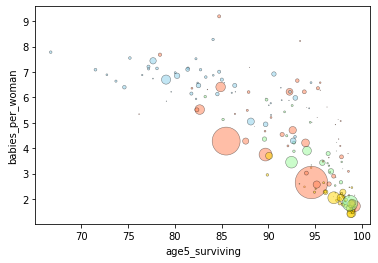

In [11]:
plotdata()

In [13]:
'''
We're going to fit models using the Python package, Statsmodels

We're going to use the (default) OLS fit method, which means Ordinary Least Squares. This
is done by minimizing the sum of square differences between between model predictions
and observations. "Ordinary" means that the model coefficients appear linearly in
the model formulas. This means they multiply explanatory variables or functions
of explanatory variables.

Stats models lets us specify models by the way of the tilde (~) formula notation.
The formulas have this format: response variable, tilde, model terms.
Ex. babies_per_woman ~ age5_surviving

Statsmodels usage goes as follows:
we define a model and assign the data. We imported Statsmodels as SMF and model
is ols (ordinary least squares) and formula will be babies_per_woman ~ 1 (which
represents a constant). We then assign the dataset gdata to the model.

'''
model = smf.ols(formula='babies_per_woman ~ 1',data=gdata)

In [14]:
'''
Next, we need to fit the model.
'''
grandmean = model.fit()

In [16]:
'''
Finally, we interrogate the results object
'''

grandmean

In [17]:
'''
The first thing we can do is to use its method "predict" which lets us reproduce
model values. We plot them by reproducing colors, but not sizes. We'll make a
function as we'll be doing this alot.

In the function:
First we plot the data. Then we do a scatter plot of one explanatory variable
against the model prediction.
'''
def plotfit(fit):
    plotdata()
    plt.scatter(gdata.age5_surviving,fit.predict(gdata),
               c=colors,s=30,linewidths=0.5,edgecolor='k',marker='D')

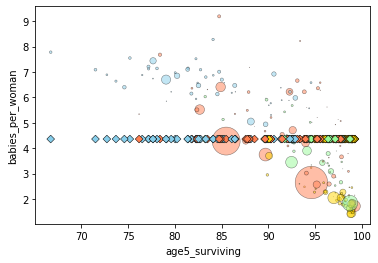

In [18]:
'''
As the grand mean name implies, the result of doing this model is equivalent to
returning the mean of our response variables
'''
plotfit(grandmean)

In [20]:
'''
We can see this by comparing the fit parameters, which are held in the attribute
params of the results object with a simple mean of the data.
'''
grandmean.params

Intercept    4.360714
dtype: float64

In [21]:
'''
I guess it's the same thing as above?
He says the constant term is known as intercept.
'''
gdata.babies_per_woman.mean()

4.360714285714285

In [19]:
'''
If we now introduce the region as the model term, we get the model equivalent by
taking means by group.
To add a model term, we add it on the right-hand side of the formula with a plus.
The .fit() is added directly to the code.
'''
groupmeans = smf.ols(formula='babies_per_woman ~ 1 + region',data=gdata).fit()

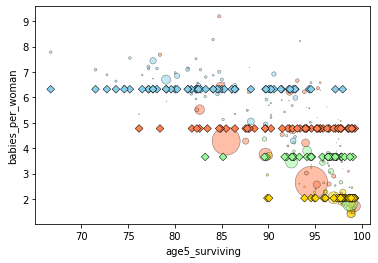

In [22]:
plotfit(groupmeans)

In [23]:
'''
We now look at parameters. What we get here is a common constant term, and then 
offsets four groups minus one of them.
'''
groupmeans.params

Intercept            6.321321
region[T.America]   -2.663139
region[T.Asia]      -1.545744
region[T.Europe]    -4.285639
dtype: float64

In [24]:
'''
To treat all groups in the same way, we would write a constant with a minus.
'''
groupmeans = smf.ols(formula='babies_per_woman ~ -1 + region',data=gdata).fit()

In [25]:
groupmeans.params

region[Africa]     6.321321
region[America]    3.658182
region[Asia]       4.775577
region[Europe]     2.035682
dtype: float64

In [26]:
'''
We now compare to the group means
'''
gdata.groupby('region').babies_per_woman.mean()

region
Africa     6.321321
America    3.658182
Asia       4.775577
Europe     2.035682
Name: babies_per_woman, dtype: float64

In [27]:
'''
Now we try something that we cannot get out of simple means. We add a quantitative
variable, child survival as a main term in the model.
'''
surviving = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving',data=gdata).fit()

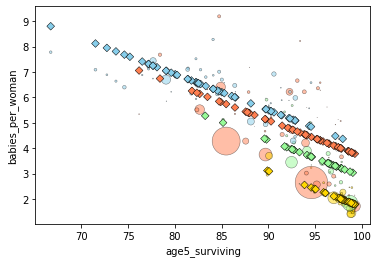

In [28]:
'''
Visually, the fit is improving and the fit parameters are interesting.
'''
plotfit(surviving)

In [30]:
'''
An interesting one is age5_surviving which is a slope or derivative. It tells us
that for every additional percentage point of child survival to age five, the 
number of babies per woman decreases by 0.14. Now the constant group terms are
large because they theorectically represent the number of children for survivor
rate of 0%
'''
surviving.params

region[Africa]     18.265792
region[America]    17.085884
region[Asia]       17.864741
region[Europe]     15.872183
age5_surviving     -0.141886
dtype: float64

In [31]:
'''
If we wish to have a different slope for every region, we can throw in an 
interaction term as opposed to a main term which involves two explanatory 
variables. The interaction term is written with a "colon."
'''
surviving_byregion = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region',data=gdata).fit()

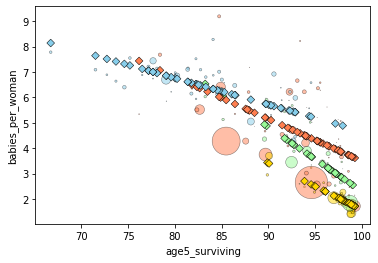

In [32]:
'''
Now we see that we have 4 different slopes. India and China, represented by large
circles, seem to be outliers with respect to the fit.
'''
plotfit(surviving_byregion)

In [34]:
surviving_byregion.params

region[Africa]                    15.080914
region[America]                   27.506243
region[Asia]                      20.032483
region[Europe]                    19.884446
age5_surviving:region[Africa]     -0.104053
age5_surviving:region[America]    -0.251994
age5_surviving:region[Asia]       -0.165384
age5_surviving:region[Europe]     -0.183029
dtype: float64

In [35]:
'''
Perhaps we can account for the outliers by including another main term, this time
proportional to population.
'''
surviving_byregion_population = smf.ols(formula='babies_per_woman ~ -1 + region + age5_surviving:region + population',data=gdata).fit()

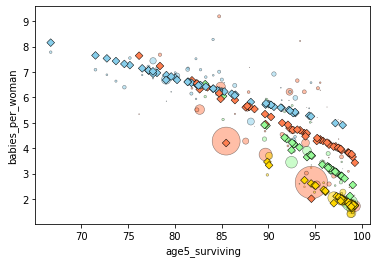

In [36]:
plotfit(surviving_byregion_population)

In [37]:
surviving_byregion_population.params

region[Africa]                    1.513953e+01
region[America]                   2.721512e+01
region[Asia]                      2.060924e+01
region[Europe]                    1.997501e+01
age5_surviving:region[Africa]    -1.044609e-01
age5_surviving:region[America]   -2.484114e-01
age5_surviving:region[Asia]      -1.702392e-01
age5_surviving:region[Europe]    -1.835316e-01
population                       -2.367914e-09
dtype: float64